### DrivenData Flu Shot Competition

This runthrough will focus on <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier'>random forest classifier</a> method. Possible method, <a href = 'https://stackoverflow.com/questions/59672268/random-forest-classifier-for-categorical-data'>here</a>. <a href = 'https://www.freecodecamp.org/news/how-to-use-the-tree-based-algorithm-for-machine-learning/'>Binary classification</a> (ours is multi label).

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
pd.set_option("display.max_columns", 100)

Import dataframes

In [27]:
features_path = 'C:/Users/Chloe.Dickinson/Documents/Python Scripts/Competitions/DrivenData/datasets/training_set_features.csv'
labels_path = "C:/Users/Chloe.Dickinson/Documents/Python Scripts/Competitions/DrivenData/datasets/training_set_labels.csv"

features_df = pd.read_csv(features_path, index_col = "respondent_id")
labels_df = pd.read_csv(labels_path, index_col = "respondent_id")

In [28]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

#### Clean data - preprocessing

- Remove NaNs
    - Impute in relevant ways
    - Remove 'employment_industry' and 'employment_occupation'
- Scale

These can be done in a few lines using a Pipeline.

In [29]:
to_drop = ['employment_industry', 'employment_occupation']

features_df.drop(columns = to_drop,
                    inplace = True)

Creation of pipeline

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [48]:
#use 'most_frequent' when imputing
numeric_preprocessing_steps = Pipeline([('standard_scaler', StandardScaler()),
                                        ('simple_imputer', SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent'))])

#identify numeric columns. standardscaler only works with numeric values.
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

preprocessor = ColumnTransformer(
    transformers = [('numeric', numeric_preprocessing_steps, numeric_cols)],
    remainder = 'drop'
                                )

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [49]:
print(features_df.columns)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')


Please be aware, the above operation (preprocessor) has removed all categorical columns.

#### Modelling
- Use Random Forest, box-fresh, first of all

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier

Set up pipeline

In [53]:
estimators = MultiOutputClassifier(
    estimator = RandomForestClassifier(n_estimators = 100))

full_pipeline = Pipeline([('preprocessor', preprocessor),
                          ('estimators', estimators)]
                        )

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gather...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adult

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features_df,
                                                    labels_df,
                                                    test_size = 0.33,
                                                    shuffle = True,
                                                    stratify = labels_df,
                                                    random_state = 88
                                                    )

In [55]:
#train model
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gather...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adult

In [57]:
#predict on test set
preds = full_pipeline.predict_proba(X_test)
preds

[array([[0.98  , 0.02  ],
        [1.    , 0.    ],
        [0.91  , 0.09  ],
        ...,
        [0.88  , 0.12  ],
        [0.48  , 0.52  ],
        [0.9125, 0.0875]]),
 array([[0.87      , 0.13      ],
        [0.58254762, 0.41745238],
        [0.16      , 0.84      ],
        ...,
        [0.89      , 0.11      ],
        [0.33      , 0.67      ],
        [0.81416667, 0.18583333]])]

2 arrays created. First is for h1n1_vaccine, second is seasonal_vaccine. DF of that:

In [61]:
y_preds = pd.DataFrame({'h1n1_vaccine': preds[0][:, 1],
                        'seasonal_vaccine': preds[1][:, 1]},
                       index = y_test.index
                        )
print('y_preds.shape', y_preds.shape)
y_preds.head()

y_preds.shape (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
1028,0.02,0.130000
1251,0.00,0.417452
712,0.09,0.840000
10165,0.26,0.174000
26647,0.09,0.125000


The competition uses ROC AUC as the metric. Code from the benchmark project:

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [65]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

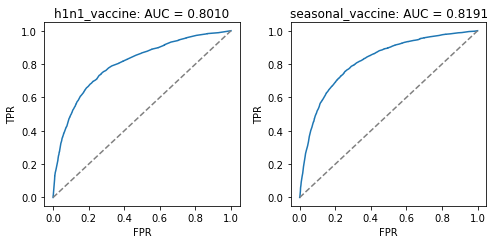

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [67]:
roc_auc_score(y_test, y_preds)

0.8100752627560176

#### Now on the whole dataset.

In [68]:
full_pipeline.fit(features_df, labels_df)
None

In [69]:
test_features_df = pd.read_csv('C:/Users/Chloe.Dickinson/Documents/Python Scripts/Competitions/DrivenData/datasets/test_set_features.csv',
                              index_col = 'respondent_id') 

In [70]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

C:\Users\Chloe.Dickinson\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


[array([[0.91, 0.09],
        [0.96, 0.04],
        [0.51, 0.49],
        ...,
        [0.93, 0.07],
        [0.91, 0.09],
        [0.33, 0.67]]),
 array([[0.21016667, 0.78983333],
        [0.99      , 0.01      ],
        [0.19      , 0.81      ],
        ...,
        [0.6125    , 0.3875    ],
        [0.58      , 0.42      ],
        [0.37      , 0.63      ]])]

In [71]:
submission_df = pd.read_csv('C:/Users/Chloe.Dickinson/Documents/Python Scripts/Competitions/DrivenData/datasets/submission_format.csv',
                           index_col = 'respondent_id')

In [72]:
submission_df['h1n1_vaccine'] = test_probas[0][:, 1]
submission_df['seasonal_vaccine'] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.090000,0.789833
26708,0.040000,0.010000
26709,0.490000,0.810000
26710,0.778298,0.936667
26711,0.320000,0.660000


In [74]:
submission_df.to_csv("run2-randomforest-depth100.csv", index = True)